<a href="https://colab.research.google.com/github/KiambiC9/Numerical-Simulation-Monte-Carlo-Simulation/blob/main/204843_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import math
from math import sqrt, exp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

**Question 1 : Numerical Method - Euler Maruyama**

In [17]:
#Parameters
mu = 0.15
kappa_v = 1.0
vega = 0.04
sigma_v = 0.2
S0 = 0.5
v0 = 0.04
T = 1.0
n_sims = 10000
n_steps = 1000
dt = T/n_steps
np.random.seed(42)



In [18]:
#simulation function
def simulate_sv(rho,sigma_v,n_sims=n_sims,n_steps=n_steps):
    S_T = np.zeros(n_sims)

    for _ in range(n_steps):
        S, v = S0, v0
        #Step 1: Cholesky Decomposition
        z1 = np.random.normal(size=n_sims)
        z2 = np.random.normal(size=n_sims)
        dW1 = z1 * np.sqrt(dt)
        dW2 = (rho * z1 + np.sqrt(1 - rho**2) * z2) * np.sqrt(dt)

        # Step 2: Variance update using Euler Maruyama
        v = v + kappa_v * (vega - v) * dt + sigma_v * np.sqrt(np.maximum(v, 0)) * dW2
        v = np.maximum(v, 0)

        # Step 3: Stock update
        S = S + S * (mu * dt + np.sqrt(np.maximum(v, 0)) * dW1)

    return S

In [19]:
#Fit lognormal
def fit_lognormal(S_vals):
    m = np.mean(S_vals)
    s2 = np.var(S_vals, ddof=1)
    sigma2_ln = np.log(1 + s2 / m**2)
    mu_ln = np.log(m) - 0.5 * sigma2_ln
    return mu_ln, np.sqrt(sigma2_ln)


In [20]:
def plot_distribution(S_vals, title, logy=False):
    mu_ln, sigma_ln = fit_lognormal(S_vals)
    x = np.linspace(min(S_vals), max(S_vals), 400)
    pdf = lognorm.pdf(x, s=sigma_ln, scale=np.exp(mu_ln))

    plt.figure(figsize=(8,5))
    plt.hist(S_vals, bins=100, density=True, alpha=0.6, label="Simulated")
    plt.plot(x, pdf, 'r-', lw=2, label="Log-normal fit")
    if logy:
        plt.yscale("log")
    plt.title(title)
    plt.xlabel("S(T)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


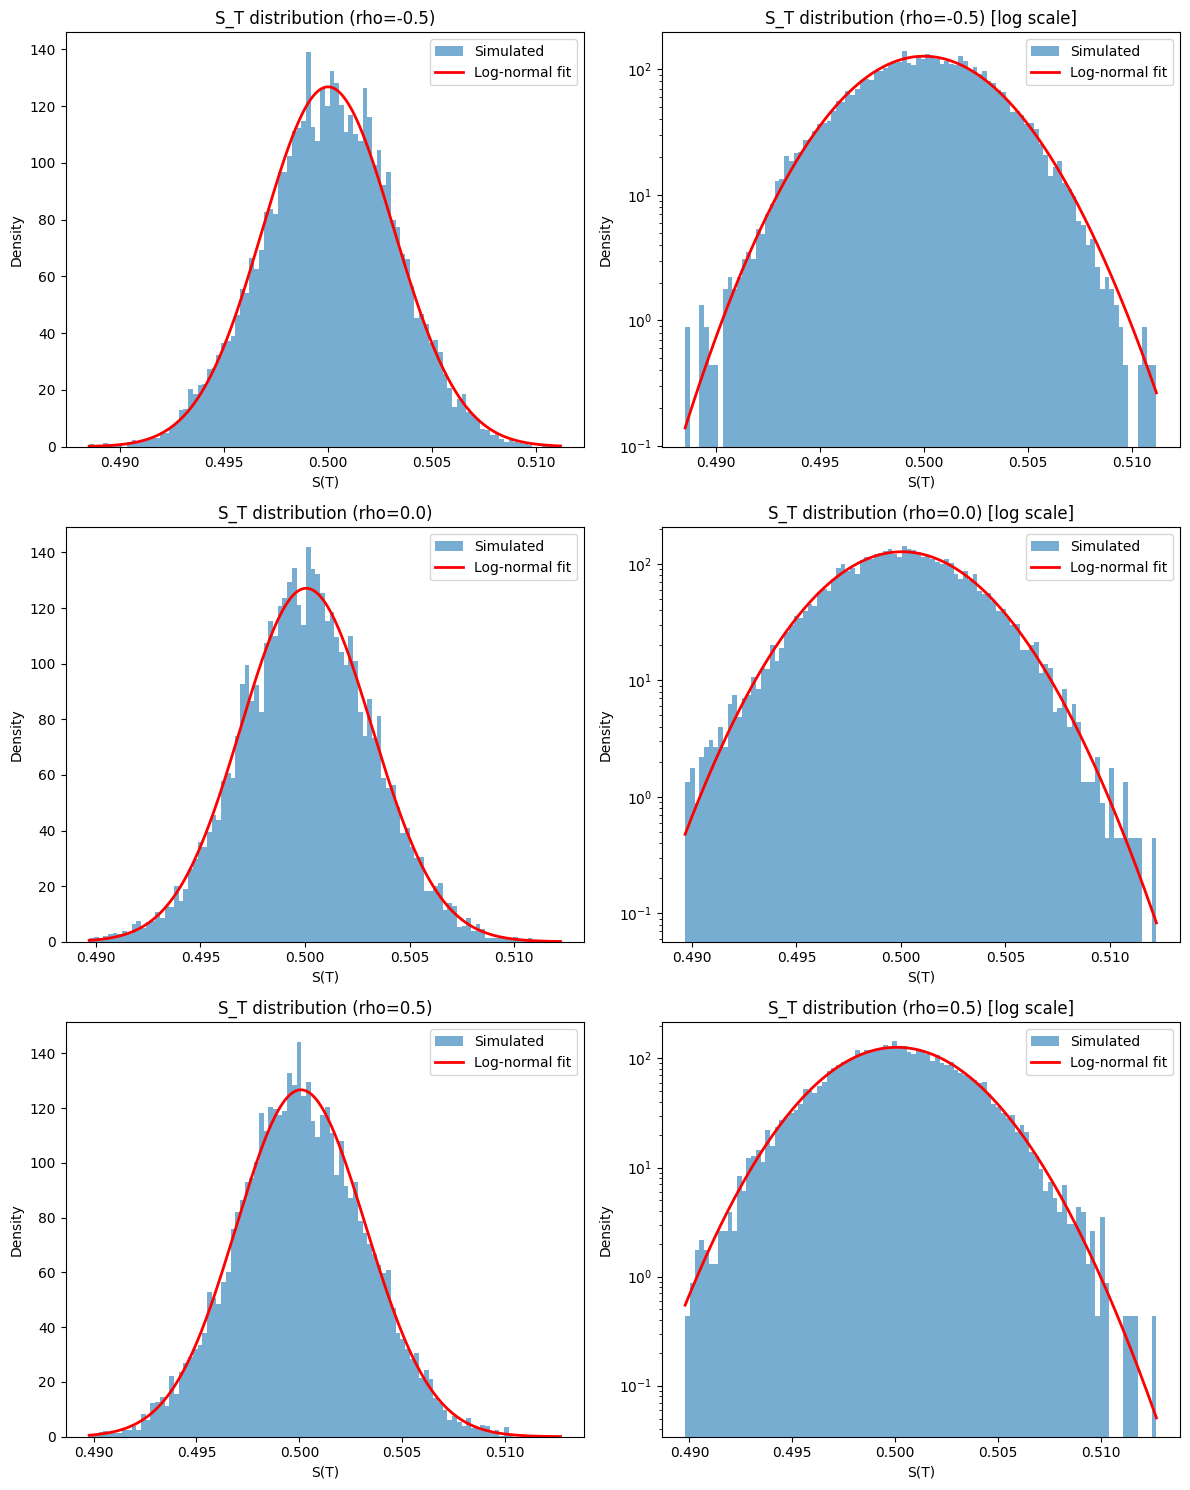

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

rho_values = [-0.5, 0.0, 0.5]
sigma_v_values = [0.5, 1.0, 1.5]

# Plot distributions for varying rho
for i, rho in enumerate(rho_values):
    S_T_rho = simulate_sv(rho=rho, sigma_v=0.2)
    mu_ln_rho, sigma_ln_rho = fit_lognormal(S_T_rho)
    x_rho = np.linspace(min(S_T_rho), max(S_T_rho), 400)
    pdf_rho = lognorm.pdf(x_rho, s=sigma_ln_rho, scale=np.exp(mu_ln_rho))

    axes[i, 0].hist(S_T_rho, bins=100, density=True, alpha=0.6, label="Simulated")
    axes[i, 0].plot(x_rho, pdf_rho, 'r-', lw=2, label="Log-normal fit")
    axes[i, 0].set_title(f"S_T distribution (rho={rho})")
    axes[i, 0].set_xlabel("S(T)")
    axes[i, 0].set_ylabel("Density")
    axes[i, 0].legend()

    axes[i, 1].hist(S_T_rho, bins=100, density=True, alpha=0.6, label="Simulated")
    axes[i, 1].plot(x_rho, pdf_rho, 'r-', lw=2, label="Log-normal fit")
    axes[i, 1].set_title(f"S_T distribution (rho={rho}) [log scale]")
    axes[i, 1].set_xlabel("S(T)")
    axes[i, 1].set_ylabel("Density")
    axes[i, 1].set_yscale("log")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()



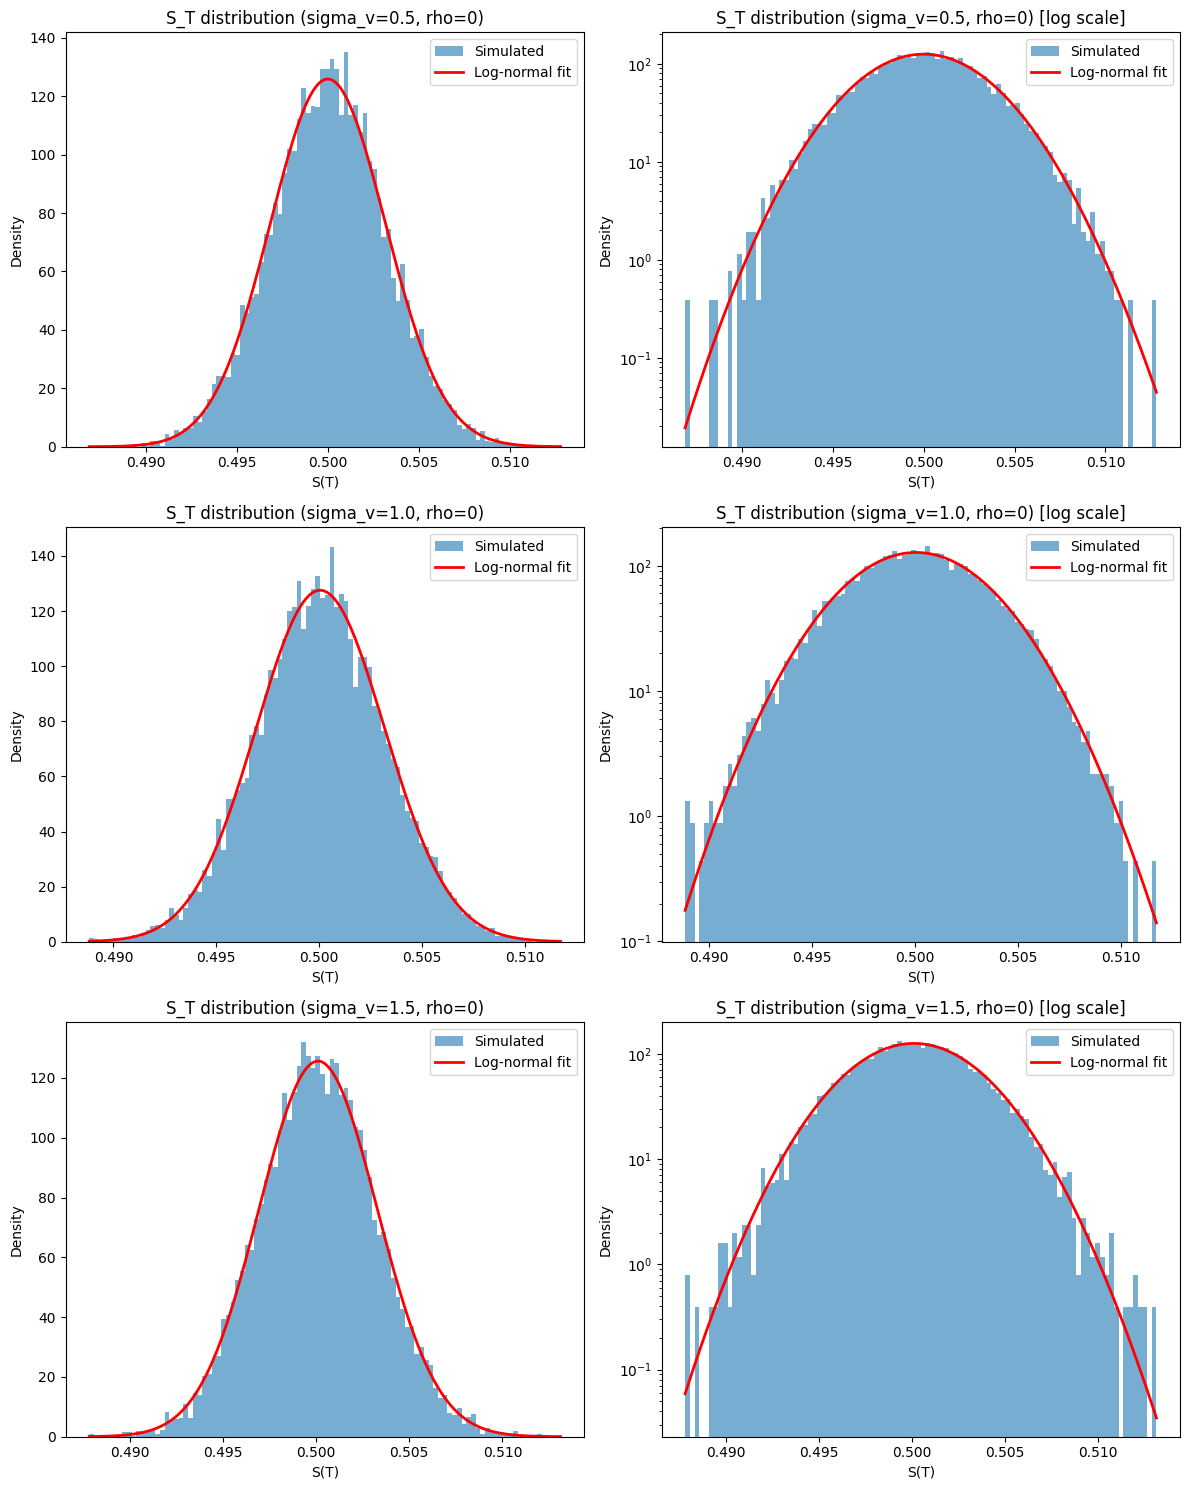

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot distributions for varying sigma_v
for i, sigma_v in enumerate(sigma_v_values):
    S_T_sigma_v = simulate_sv(rho=0.0, sigma_v=sigma_v)
    mu_ln_sigma_v, sigma_ln_sigma_v = fit_lognormal(S_T_sigma_v)
    x_sigma_v = np.linspace(min(S_T_sigma_v), max(S_T_sigma_v), 400)
    pdf_sigma_v = lognorm.pdf(x_sigma_v, s=sigma_ln_sigma_v, scale=np.exp(mu_ln_sigma_v))

    axes[i, 0].hist(S_T_sigma_v, bins=100, density=True, alpha=0.6, label="Simulated")
    axes[i, 0].plot(x_sigma_v, pdf_sigma_v, 'r-', lw=2, label="Log-normal fit")
    axes[i, 0].set_title(f"S_T distribution (sigma_v={sigma_v}, rho=0)")
    axes[i, 0].set_xlabel("S(T)")
    axes[i, 0].set_ylabel("Density")
    axes[i, 0].legend()

    axes[i, 1].hist(S_T_sigma_v, bins=100, density=True, alpha=0.6, label="Simulated")
    axes[i, 1].plot(x_sigma_v, pdf_sigma_v, 'r-', lw=2, label="Log-normal fit")
    axes[i, 1].set_title(f"S_T distribution (sigma_v={sigma_v}, rho=0) [log scale]")
    axes[i, 1].set_xlabel("S(T)")
    axes[i, 1].set_ylabel("Density")
    axes[i, 1].set_yscale("log")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


**Summary of Findings**

For sigma= 0.5, 1.0, 1.5 (rho=0)

*   At a higher, sigma, the distribution becomes more skewed and heavy-tailed.
*   The log scale makes these tail differences very clear, the simulated distributions indicate more extreme values than indicated by the log-normal fit as sigma grows

For rho = (-0.5,0,0.5) sigma=0.2,


*   rho (0.5) shifts mass to higher St (fatter right tail) relative to negative rho (-0.5)
